<a href="https://colab.research.google.com/github/EduHdzVillasana/UdemyDS/blob/main/Seccion11/%20SVM%20-%20Kernels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Identificar fronteras no lineales

In [1]:
from sklearn.datasets.samples_generator import make_circles, make_blobs

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
X, Y = make_circles(100, factor = .1, noise = .1) 

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC

In [4]:
def plt_svc(model, ax=None, plot_support=True):
    """Plot de la función de decisión para una clasificación en 2D con SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    ##Generamos la parrila de puntos para evaluar el modelo
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(yy,xx)
    
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    
    ##Representamos las fronteras y los márgenes del SVC
    ax.contour(X,Y,P, colors="k", levels=[-1,0,1], alpha = 0.5, linestyles=["--", "-", "--"])
        
    if plot_support:
        ax.scatter(model.support_vectors_[:,0], 
                   model.support_vectors_[:,1], 
                   s=300, linewidth=1, facecolors = "blue");
    
    
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    

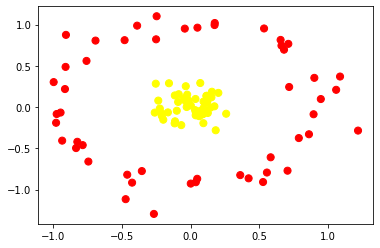

In [5]:
plt.scatter(X[:,0], X[:,1], c=Y, s=50, cmap="autumn")

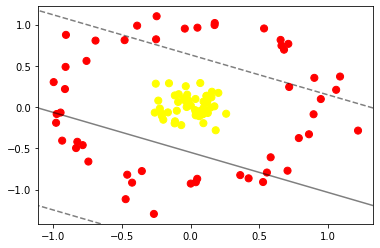

In [6]:
plt.scatter(X[:,0], X[:,1], c=Y, s=50, cmap="autumn")
plt_svc(SVC(kernel="linear").fit(X,Y), plot_support=False)

In [7]:
r = np.exp(-(X**2).sum(1))

In [8]:
r

array([0.44460678, 0.98800463, 0.99080079, 0.99276313, 0.98275824,
       0.96925804, 0.46683493, 0.97910767, 0.43593165, 0.98868882,
       0.91390194, 0.98385183, 0.32390136, 0.96346008, 0.40328167,
       0.95130194, 0.36076773, 0.98664316, 0.33537135, 0.46858661,
       0.42693618, 0.33511717, 0.40421219, 0.9936855 , 0.38808467,
       0.93022804, 0.47835091, 0.96752725, 0.98678359, 0.98476589,
       0.41226185, 0.3432591 , 0.99961025, 0.94901184, 0.20879369,
       0.8655631 , 0.9941785 , 0.3918391 , 0.93912399, 0.28004999,
       0.20449129, 0.99370203, 0.96880139, 0.38452936, 0.98472906,
       0.98810548, 0.48340838, 0.39502627, 0.43682756, 0.36110805,
       0.9429464 , 0.95844781, 0.94634009, 0.41321129, 0.39133292,
       0.96771492, 0.98911504, 0.39680586, 0.30306723, 0.39045105,
       0.35423935, 0.95097518, 0.9682108 , 0.42319638, 0.95424736,
       0.33845838, 0.89359728, 0.33171605, 0.26704378, 0.97021613,
       0.96885549, 0.92893374, 0.37041763, 0.98385867, 0.32472

In [9]:
from mpl_toolkits import mplot3d

In [10]:
def plot_3D(elev=30, azim=30, X=X, Y=Y, r=r):
    ax = plt.subplot(projection="3d")
    ax.scatter3D(X[:,0], X[:,1],r, c=Y, s= 50, cmap="autumn")
    ax.view_init(elev=elev, azim=azim)
    
    ax.set_xlabel("x[0]")
    ax.set_ylabel("y[1]")
    ax.set_zlabel("r")
    
    

In [11]:
from ipywidgets import interact, fixed

In [12]:
interact(plot_3D, elev=[-90,-60,-30,0,30,60,90], 
         azim=[-180,-150,-120,-90,-60,-30,0,30,60,90,120,150, 180], 
         X = fixed(X), Y = fixed(Y), r = fixed(r))

interactive(children=(Dropdown(description='elev', index=4, options=(-90, -60, -30, 0, 30, 60, 90), value=30),…

<function __main__.plot_3D>

In [16]:
rbf = SVC(kernel="rbf", C=1E6)
rbf.fit(X,Y)

SVC(C=1000000.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

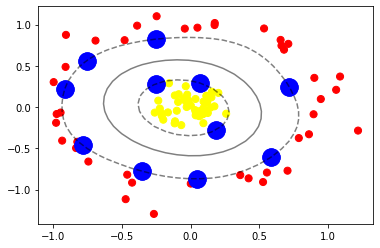

In [14]:
plt.scatter(X[:,0], X[:,1], c=Y, s=50, cmap="autumn")
plt_svc(rbf)
plt.scatter(rbf.support_vectors_[:,0], rbf.support_vectors_[:,1], s=300, lw=1, facecolors="blue")

In [34]:
def plt_svc(model, ax=None, plot_support=True):
    """Plot de la función de decisión para una clasificación en 2D con SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    ##Generamos la parrila de puntos para evaluar el modelo
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(yy,xx)
    
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    
    ##Representamos las fronteras y los márgenes del SVC
    ax.contour(X,Y,P, colors="k", levels=[-1,0,1], alpha = 0.5, linestyles=["--", "-", "--"])
        

    
    
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

In [43]:
def prueba_kernel ( X, Y,kernel_ = "linear", C = 1000):
  model = SVC(kernel = kernel_, C = C )
  model.fit(X,Y)
  plt.scatter(X[:,0], X[:,1], c = Y, cmap = "autumn")
  plt_svc(model)
  print ("SCORE: ",model.score(X,Y))
  #plt.scatter(model.support_vectors_[:,0], model.support_vectors_[:,1], s = 50, lw = 1, facecolors = "blue")

In [44]:
interact(prueba_kernel, X = fixed(X), Y = fixed(Y), kernel_ = ['linear', 'poly', 'rbf', 'sigmoid'])

interactive(children=(Dropdown(description='kernel_', options=('linear', 'poly', 'rbf', 'sigmoid'), value='lin…

<function __main__.prueba_kernel>

## Ajustar los parámetros de SVM

In [ ]:
X, Y = make_blobs(n_samples=100, centers = 2, random_state=0, cluster_std=1.2)

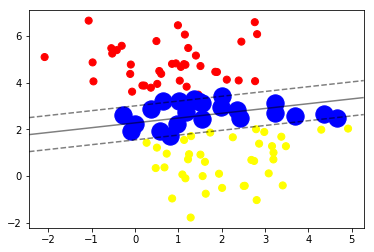

In [ ]:
plt.scatter(X[:,0], X[:,1], c = Y, s=50, cmap="autumn")
model = SVC(kernel="linear", C=10)
model.fit(X,Y)
plt_svc(model)

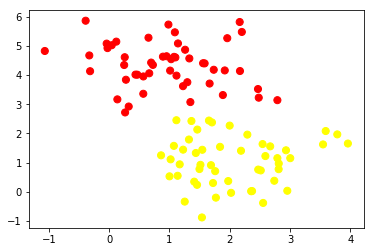

In [ ]:
X, Y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=0.8)
plt.scatter(X[:,0], X[:,1], c = Y, s=50, cmap="autumn")

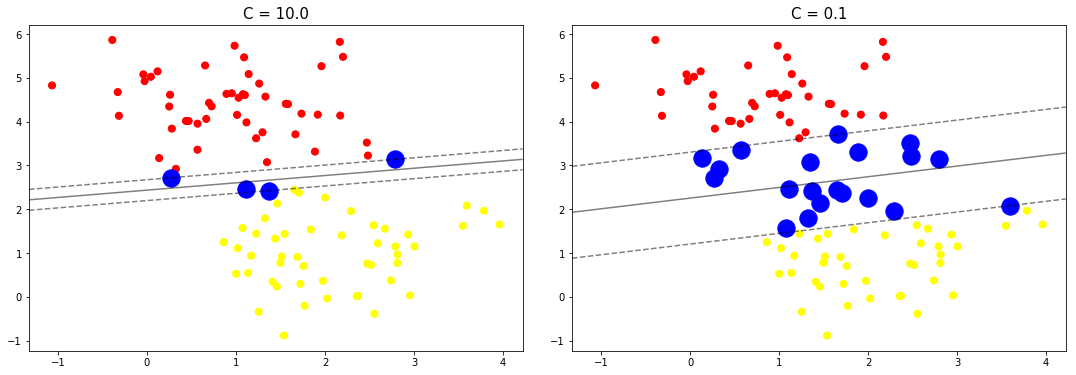

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(16,6))
fig.subplots_adjust(left = 0.05, right = 0.95, wspace=0.1)

for ax_i, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel="linear", C=C)
    model.fit(X,Y)
    ax_i.scatter(X[:,0],X[:,1], c = Y, s = 50, cmap="autumn")
    plt_svc(model, ax_i)
    ax_i.set_title("C = {0:.1f}".format(C), size = 15)